In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

In [2]:
def demand_function(p,v):
    if p>v:
        return 0
    else:
        return 1
    
# Linear supply function 

def supply_function(p,c1,c2):
  return c1+c2*p

In [190]:
v11,v21,v31,v41,v51=2.6, 2.2, 2, 1.6, 1.2
v12,v22,v32,v42,v52=4.7, 3.7, 2.2, 2, 1.8

p1_range = np.linspace(0, 3, 1000)
d11 = [demand_function(p1,v11) for p1 in p1_range]
d21 = [demand_function(p1,v21) for p1 in p1_range]
d31 = [demand_function(p1,v31) for p1 in p1_range]
d41 = [demand_function(p1,v41) for p1 in p1_range]
d51 = [demand_function(p1,v51) for p1 in p1_range]

# eqm1: i2,i3 buy x1; i4,i5 priced out
# eqm2: i1, i2 buy x2; i2 upgrades; i4 priced in; i5 priced out

D1_eqm1 = [x21+x31+x41+x51 for x21,x31,x41,x51 in zip(d21,d31,d41,d51)]
D1_eqm2 = [x31+x41+x51 for x31,x41,x51 in zip(d31,d41,d51)]
# i2 upgrades

S1_eqm1 = [supply_function(p1,2,0) for p1 in p1_range]

p2_range = np.linspace(0, 6, 1000)
d12 = [demand_function(p2,v12) for p2 in p2_range]
d22 = [demand_function(p2,v22) for p2 in p2_range]
d32 = [demand_function(p2,v32) for p2 in p2_range]
d42 = [demand_function(p2,v42) for p2 in p2_range]
d52 = [demand_function(p2,v52) for p2 in p2_range]

D2_eqm1 = [x12+x42+x52 for x12,x42,x52 in zip(d12,d42,d52)]
D2_eqm2 = [x12+x22+x52 for x12,x22,x52 in zip(d12,d22,d52)]

S2_eqm1 = [supply_function(p2,1,0) for p2 in p2_range]
S2_eqm2 = [supply_function(p2,2,0) for p2 in p2_range]


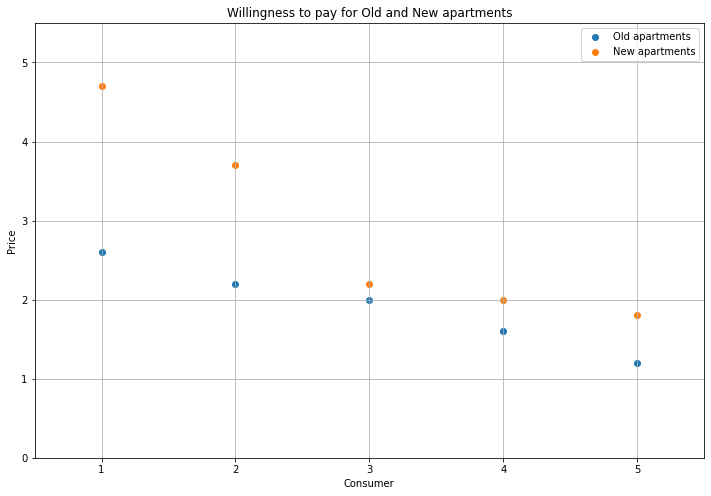

In [191]:
# demand for x1 and x2

wtp_x1 = [(3, v31), (2, v21), (1, v11), (4,v41), (5,v51)]
x1,y1 = zip(*wtp_x1)

wtp_x2 = [(3, v32), (2, v22), (1, v12), (4,v42), (5,v52)]
x2,y2 = zip(*wtp_x2)

plt.figure(figsize=(12, 8))
plt.scatter(x1, y1, label="Old apartments")
plt.scatter(x2, y2, label="New apartments")

plt.xlabel('Consumer')
plt.ylabel('Price')
plt.title('Willingness to pay for Old and New apartments')

plt.ylim(0, 5.5)
plt.xlim(0.5,5.5)
plt.xticks([3, 2, 1, 4,5])
plt.grid(True)
plt.legend()
plt.show()

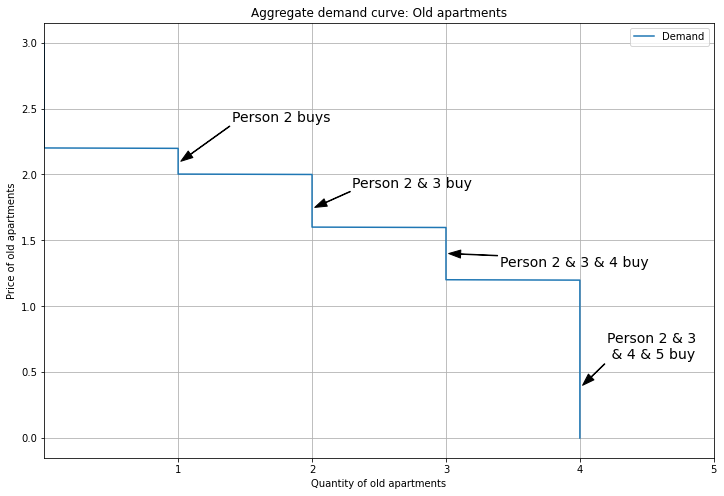

In [192]:
# aggregate demand for x1
plt.figure(figsize=(12,8))
plt.plot(D1_eqm1, p1_range, label="Demand")
plt.xlabel("Quantity of old apartments")
plt.ylabel("Price of old apartments")
plt.title("Aggregate demand curve: Old apartments")
plt.grid(True)
plt.xlim(0,3)
plt.legend()
plt.xticks(range(1,6))

plt.annotate('Person 2 buys',xy=(1.02,2.1), xytext=(1.4, 2.4), fontsize=14, 
        arrowprops=dict(facecolor='black', width=0.5, headwidth=8))
plt.annotate('Person 2 & 3 buy',xy=(2.02,1.75), xytext=(2.3,1.9), fontsize=14, 
        arrowprops=dict(facecolor='black', width=0.5, headwidth=8))
plt.annotate('Person 2 & 3 & 4 buy',xy=(3.02,1.4), xytext=(3.4,1.3), fontsize=14, 
        arrowprops=dict(facecolor='black', width=0.5, headwidth=8))
plt.annotate('Person 2 & 3\n & 4 & 5 buy',xy=(4.02,0.4), xytext=(4.2,0.6), fontsize=14, 
        arrowprops=dict(facecolor='black', width=0.5, headwidth=8))
plt.show()


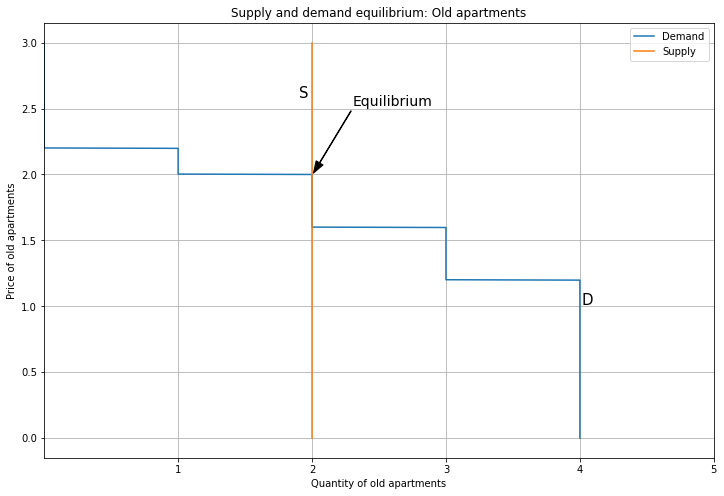

In [193]:
# aggregate demand and supply for x1

plt.figure(figsize=(12,8))
plt.plot(D1_eqm1, p1_range, label="Demand")
plt.plot(S1_eqm1, p1_range, label="Supply")
plt.xlabel("Quantity of old apartments")
plt.ylabel("Price of old apartments")
plt.title("Supply and demand equilibrium: Old apartments")
plt.grid(True)
plt.xlim(0, 3)
plt.xticks(range(1,6))
plt.legend()

plt.annotate('D',xy=(4.01,1.01), fontsize=15)
plt.annotate('S',xy=(1.9,2.58), fontsize=15)

plt.annotate('Equilibrium',xy=(2.01,2.01), xytext=(2.3,2.52), fontsize=14, 
        arrowprops=dict(facecolor='black', width=0.5, headwidth=8))

plt.show()

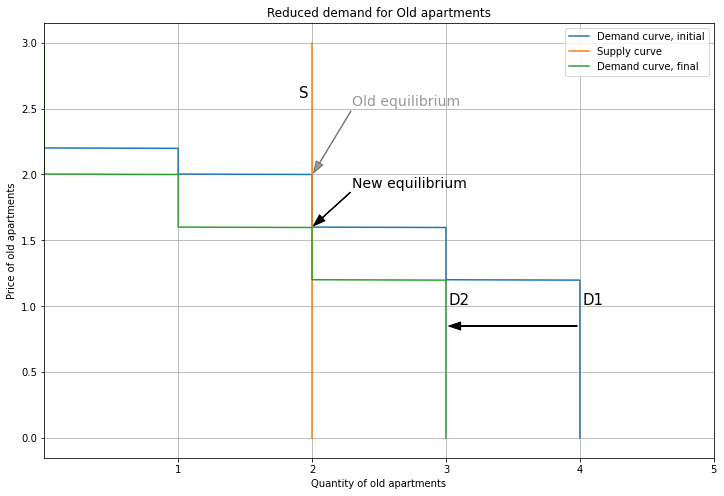

In [194]:
# aggregate demand and supply for x1: shift demand

plt.figure(figsize=(12,8))
plt.plot(D1_eqm1, p1_range, label="Demand curve, initial")
plt.plot(S1_eqm1, p1_range, label="Supply curve")
plt.plot(D1_eqm2, p1_range, label="Demand curve, final")
plt.xlabel("Quantity of old apartments")
plt.ylabel("Price of old apartments")
plt.title("Reduced demand for Old apartments")
plt.grid(True)
plt.xlim(0, 3)
plt.xticks(range(1,6))
plt.legend()

plt.annotate('D1',xy=(4.02,1.01), fontsize=15)
plt.annotate('D2',xy=(3.02,1.01), fontsize=15)
plt.annotate('S',xy=(1.9,2.58), fontsize=15)

# demand shift arrows
plt.annotate('',xy=(3.02,0.85), xytext=(3.98, 0.85),arrowprops=dict(
    facecolor='black', width=0.5, headwidth=8))

plt.annotate('New equilibrium',xy=(2.01,1.61), xytext=(2.3,1.9), fontsize=14, 
        arrowprops=dict(facecolor='black', width=0.5, headwidth=8))
plt.annotate('Old equilibrium',xy=(2.01,2.01), xytext=(2.3,2.52), fontsize=14, 
        arrowprops=dict(facecolor='black', width=0.5, headwidth=8, alpha=0.4), alpha=0.4)

plt.show()

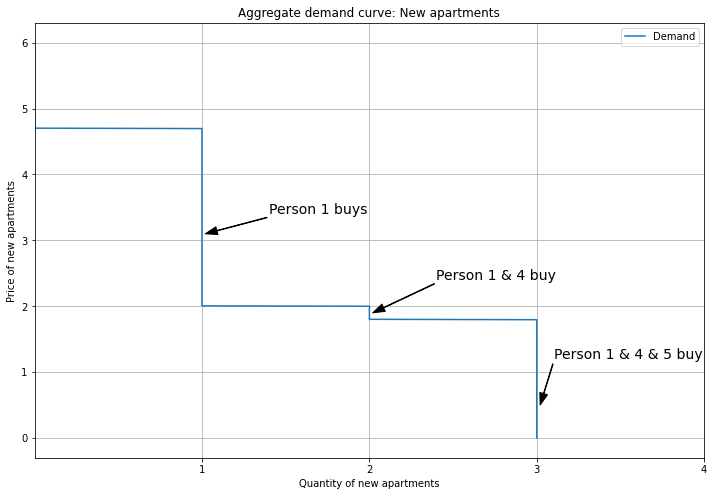

In [195]:
# aggregate demand for x2

plt.figure(figsize=(12,8))
plt.plot(D2_eqm1, p2_range, label="Demand")
plt.xlabel("Quantity of new apartments")
plt.ylabel("Price of new apartments")
plt.title("Aggregate demand curve: New apartments")
plt.grid(True)
plt.xlim(0,3)
plt.legend()
plt.xticks(range(1,5))

plt.annotate('Person 1 buys',xy=(1.02,3.1), xytext=(1.4, 3.4), fontsize=14, 
        arrowprops=dict(facecolor='black', width=0.5, headwidth=8))
plt.annotate('Person 1 & 4 buy',xy=(2.02,1.9), xytext=(2.4, 2.4), fontsize=14, 
        arrowprops=dict(facecolor='black', width=0.5, headwidth=8))
plt.annotate('Person 1 & 4 & 5 buy',xy=(3.02,0.5), xytext=(3.1, 1.2), fontsize=14, 
        arrowprops=dict(facecolor='black', width=0.5, headwidth=8))

plt.show()

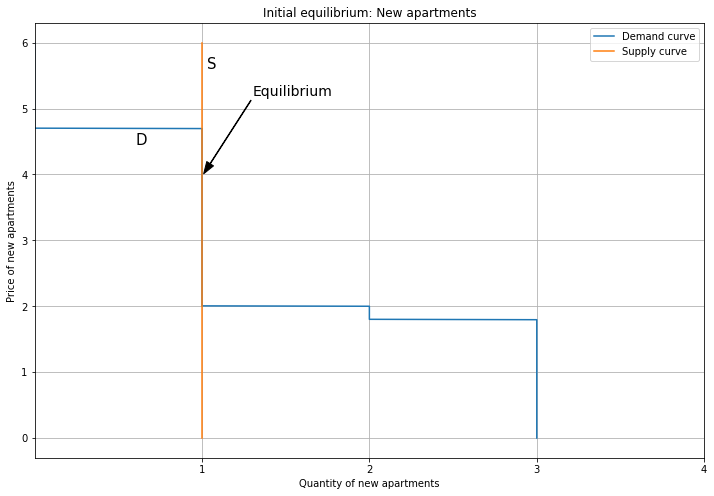

In [196]:
# aggregate supply and demand for x2
plt.figure(figsize=(12,8))
plt.plot(D2_eqm1, p2_range, label="Demand curve")
plt.plot(S2_eqm1, p2_range, label="Supply curve")
plt.xlabel("Quantity of new apartments")
plt.ylabel("Price of new apartments")
plt.title("Initial equilibrium: New apartments")
plt.grid(True)
plt.xlim(0, 3)
plt.legend()
plt.xticks(range(1,5))

# label curves
plt.annotate('D',xy=(0.6,4.45), fontsize=15)
plt.annotate('S',xy=(1.03,5.6), fontsize=15)

plt.annotate('Equilibrium',xy=(1.01,4.01), xytext=(1.3, 5.2), fontsize=14,
             arrowprops=dict(facecolor='black', width=0.5, headwidth=8))

plt.show()

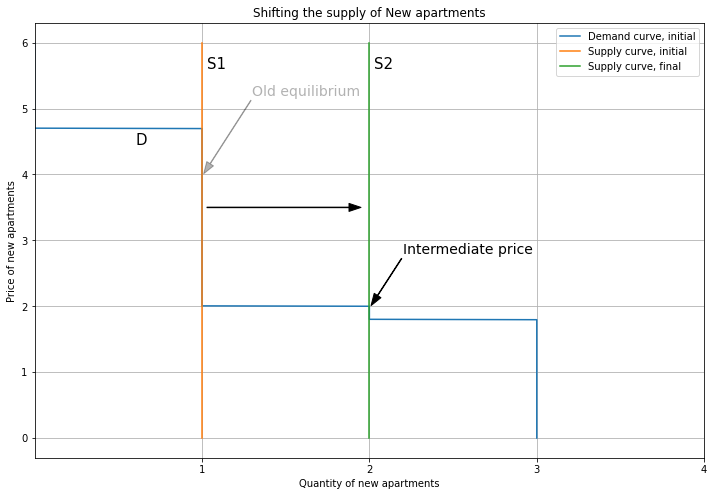

In [197]:
# shift supply of x2
plt.figure(figsize=(12,8))
plt.plot(D2_eqm1, p2_range, label="Demand curve, initial")
plt.plot(S2_eqm1, p2_range, label="Supply curve, initial")
plt.plot(S2_eqm2, p2_range, label="Supply curve, final")
plt.xlabel("Quantity of new apartments")
plt.ylabel("Price of new apartments")
plt.title("Shifting the supply of New apartments")
plt.grid(True)
plt.xlim(0, 3)
plt.legend()
plt.xticks(range(1,5))

# label curves
plt.annotate('D',xy=(0.6,4.45), fontsize=15)
plt.annotate('S1',xy=(1.03,5.6), fontsize=15)
plt.annotate('S2',xy=(2.03,5.6), fontsize=15)

plt.annotate('Old equilibrium',xy=(1.01,4.01), xytext=(1.3, 5.2), fontsize=14,
             arrowprops=dict(facecolor='black', width=0.5, headwidth=8, alpha=0.3), alpha=0.3)
plt.annotate('Intermediate price',xy=(2.01,2.01), xytext=(2.2, 2.8), fontsize=14,
             arrowprops=dict(facecolor='black', width=0.5, headwidth=8))

plt.annotate('',xy=(1.95, 3.5), xytext=(1.03,3.5),arrowprops=dict(
    facecolor='black', width=0.5, headwidth=8))

plt.show()

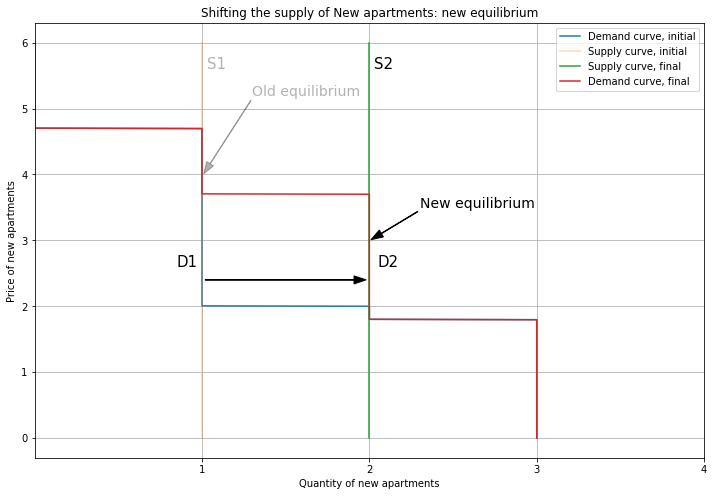

In [198]:
# shift supply of x2
plt.figure(figsize=(12,8))
plt.plot(D2_eqm1, p2_range, label="Demand curve, initial")
plt.plot(S2_eqm1, p2_range, label="Supply curve, initial", alpha=0.3)
plt.plot(S2_eqm2, p2_range, label="Supply curve, final")
plt.plot(D2_eqm2, p2_range, label="Demand curve, final")
plt.xlabel("Quantity of new apartments")
plt.ylabel("Price of new apartments")
plt.title("Shifting the supply of New apartments: new equilibrium")
plt.grid(True)
plt.xlim(0, 3)
plt.legend()
plt.xticks(range(1,5))

# label curves
plt.annotate('D1',xy=(0.85,2.6), fontsize=15)
plt.annotate('D2',xy=(2.05,2.6), fontsize=15)
plt.annotate('S1',xy=(1.03,5.6), fontsize=15, alpha=0.3)
plt.annotate('S2',xy=(2.03,5.6), fontsize=15)

plt.annotate('Old equilibrium',xy=(1.01,4.01), xytext=(1.3, 5.2), fontsize=14,
             arrowprops=dict(facecolor='black', width=0.5, headwidth=8, alpha=0.3), alpha=0.3)
plt.annotate('New equilibrium',xy=(2.01,3.01), xytext=(2.3, 3.5), fontsize=14,
             arrowprops=dict(facecolor='black', width=0.5, headwidth=8))
plt.annotate('',xy=(1.98, 2.4), xytext=(1.02,2.4),arrowprops=dict(
    facecolor='black', width=0.5, headwidth=8))

plt.show()